In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics


In [2]:
dataset = pd.read_csv("Iris.csv")
dataset.head()
dataset = dataset.set_index("Id")
dataset.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = dataset.iloc[:,0:-1]
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [4]:
y = dataset.iloc[:,-1]
y.head()


Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [5]:
y.value_counts().keys()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,test_size=0.3)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

# predicting y label for x test

y_pred = model.predict(x_test)

# calculating high variance accuracy score

print("Accuracy of model : {}%".format(round(metrics.accuracy_score(y_test,y_pred)*100,2)))
# calculating low variance accuracy of the model


Accuracy of model : 93.33%


In [6]:
model = DecisionTreeClassifier()
score = cross_val_score(model,x,y,cv=5)
print("Accuracy of model : {}%".format(round(score.mean()*100,2)))
 #calculating confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))
# printing classification report for examining predicted values


Accuracy of model : 96.0%
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


In [7]:
print(metrics.classification_report(y_test,y_pred))
from sklearn.tree import export_text


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [8]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
text = export_text(model)
print(text)
#visualization


|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.55
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.55
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_2 <= 5.45
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  5.45
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.70
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 6.05
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.05
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: Iris-virginica



In [9]:
model.fit(x_train,y_train)
fn = x.columns
cn = y.value_counts().keys();


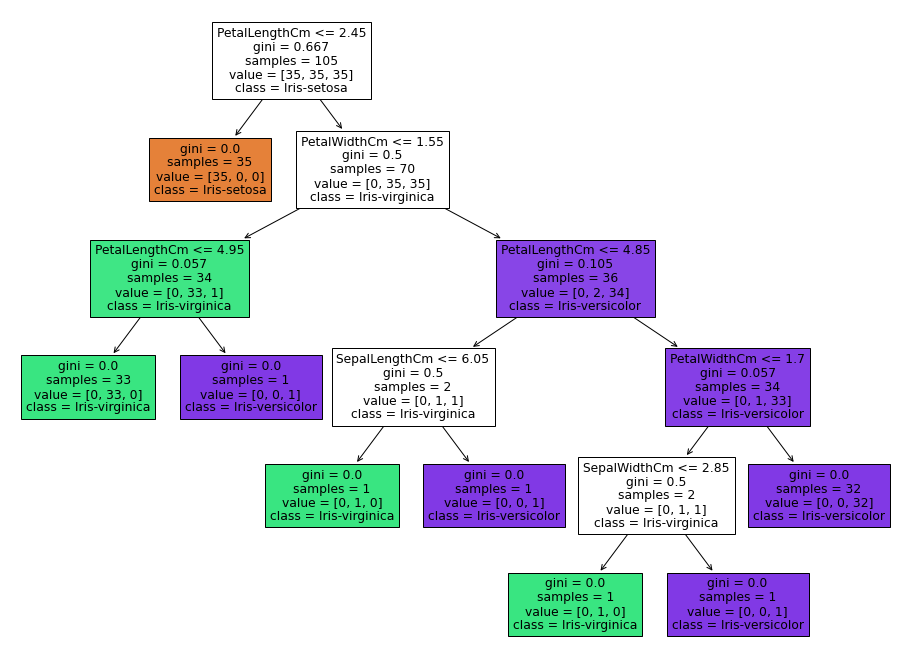

In [10]:
plt.figure(figsize=(16,12))
_ = tree.plot_tree(model,filled=True,feature_names=fn,class_names=cn)
#conda install python-graphviz
#dot -Tpng tree.dot -o tree.png

tree.export_graphviz(model,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)
